In [1]:
import pickle
import numpy as np
from model import Encoder, Decoder
from model_trainer import ModelTrainer
import tensorflow as tf
import pandas as pd


In [2]:
# load tokensised sequences
with open('data.pkl','rb') as f:
    xtrain,xtest,ytrain,ytest = pickle.load(f)

# load tokenizers
with open('xtk.pkl','rb') as f:
    xtk = pickle.load(f)
    
with open('ytk.pkl','rb') as f:
    ytk = pickle.load(f)

In [3]:
UNITS = 128
EMB_DIM = 100

# load pretrained glove embeddings
def load_glove_model(File):
    print("Loading Glove Model")
    glove_model = {}
    with open(File,'r',encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    print(f"{len(glove_model)} words loaded!")
    return glove_model
 
glove_embeddings = load_glove_model("D:/glove.6B."+str(EMB_DIM)+"d.txt")

x_emb = np.zeros((xtk.num_words+1,EMB_DIM))
for w,idx in xtk.word_index.items():
    try: x_emb[idx] = glove_embeddings[w]
    except: pass

y_emb = np.zeros((ytk.num_words+1,EMB_DIM))
for w,idx in ytk.word_index.items():
    try: y_emb[idx] = glove_embeddings[w]
    except: pass    

Loading Glove Model
400000 words loaded!


In [4]:
# build encoder
en_model = Encoder(units=UNITS, emb_dim=EMB_DIM, voc=xtk.num_words+1, pretrained_embeddings=[x_emb])
en_model.build((None,100))
en_model.summary(xtrain.shape[-1])
en_in = tf.keras.layers.Input(shape=(xtrain.shape[-1]))
en_out,en_h,en_c = en_model(en_in)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 97)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 97, 100)      3484200     ['input_1[0][0]']                
                                                                                                  
 bidirectional (Bidirectional)  [(None, 97, 256),    234496      ['embedding[0][0]']              
                                 (None, 128),                                                     
                                 (None, 128),                                                     
                                 (None, 128),                                                 

In [5]:
# build decoder
dec_model = Decoder(units=en_h.shape[-1],emb_dim=EMB_DIM,voc=ytk.num_words+1,pretrained_embeddings=[y_emb])
dec_in = tf.keras.layers.Input(shape=(1))
input_shape = [dec_in.shape,en_h.shape,en_c.shape,en_out.shape]
dec_model.build(input_shape=input_shape)
dec_model.summary([dec_in,en_h,en_c,en_out])

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 97, 256)]    0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 luong_attention (LuongAttentio  (None, 256)         131841      ['input_4[0][0]',                
 n)                                                               'input_6[0][0]']          

In [6]:
# initialise loss function and optimizer
sparse_loss = tf.keras.losses.SparseCategoricalCrossentropy()
adam = tf.keras.optimizers.Adam(learning_rate=7e-4)

In [7]:
# initialise model trainer
trainer = ModelTrainer(optimizer=adam, 
                       loss_function=sparse_loss, 
                       encoder_model=en_model, 
                       decoder_model=dec_model, 
                       x_tokenizer=xtk, 
                       y_tokenizer=ytk)

In [8]:
# train seq2seq model
trainer.train(training_data=(xtrain,ytrain), validation_data=(xtest,ytest), batch_size=32, epochs=15)

epoch = 1/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [05:19<00:00,  7.70it/s]


train_loss = 3.4803093788632538
val_loss = 3.0335032273114213
best weights saved

epoch = 2/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [08:04<00:00,  5.08it/s]


train_loss = 2.8012175778152013
val_loss = 2.6671472991385112
best weights saved

epoch = 3/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [10:00<00:00,  4.09it/s]


train_loss = 2.4338030203322463
val_loss = 2.463363547441436
best weights saved

epoch = 4/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [09:32<00:00,  4.29it/s]


train_loss = 2.1580956292472364
val_loss = 2.3190300220396463
best weights saved

epoch = 5/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [10:03<00:00,  4.07it/s]


train_loss = 1.9423766287423188
val_loss = 2.2301164586369584
best weights saved

epoch = 6/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [09:53<00:00,  4.15it/s]


train_loss = 1.7679002478433945
val_loss = 2.17813205777145
best weights saved

epoch = 7/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [10:08<00:00,  4.04it/s]


train_loss = 1.6214296473580292
val_loss = 2.151785933099142
best weights saved

epoch = 8/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [08:57<00:00,  4.58it/s]


train_loss = 1.4988592007432637
val_loss = 2.1477927332001974
best weights saved

epoch = 9/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [08:41<00:00,  4.71it/s]


train_loss = 1.392635791366689
val_loss = 2.1267746454331933
best weights saved

epoch = 10/15 learning rate = 0.000699999975040555


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [09:11<00:00,  4.46it/s]


train_loss = 1.300641946939978
val_loss = 2.1406820795400354

epoch = 11/15 learning rate = 6.999999459367245e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [08:13<00:00,  4.98it/s]


train_loss = 1.1695068141899247
val_loss = 2.1185792079785974
best weights saved

epoch = 12/15 learning rate = 6.999999459367245e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [08:23<00:00,  4.89it/s]


train_loss = 1.1412181715598773
val_loss = 2.1221655560702812

epoch = 13/15 learning rate = 6.999999641266186e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [08:34<00:00,  4.78it/s]


train_loss = 1.1217504672133471
val_loss = 2.144823453484512

epoch = 14/15 learning rate = 6.999999868639861e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [08:52<00:00,  4.62it/s]


train_loss = 1.1159849410960712
val_loss = 2.1469393699149775

epoch = 15/15 learning rate = 6.999999868639861e-08


100%|██████████████████████████████████████████████████████████████████████████████| 2460/2460 [11:23<00:00,  3.60it/s]


train_loss = 1.1159067783912249
val_loss = 2.11981335577926



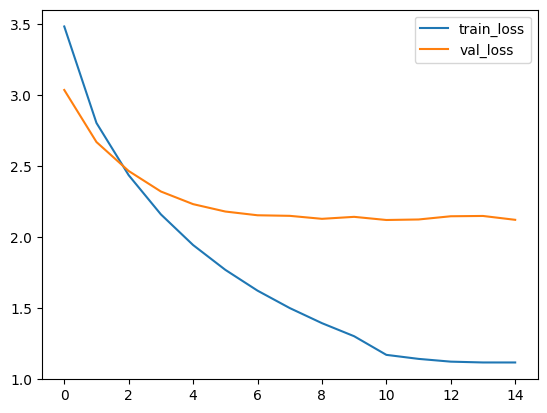

In [32]:
# plot training logs
trainer.plot_training_logs()

In [9]:
# load best model weights
en_model.load_weights('en_weights')
dec_model.load_weights('dec_weights')

In [17]:
df = pd.read_csv('C:/Users/BJS/news_summary.csv',encoding='latin-1')
df = df[['headlines','text']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  4514 non-null   object
 1   text       4514 non-null   object
dtypes: object(2)
memory usage: 70.7+ KB


In [36]:
# make predictions

idx = np.random.randint(0,len(df),(10,))
for i in idx:
    text = df.text[i]
    actual = df.headlines[i]
    
    print('Text :',text+'\n')
    
    print('actual summary :',actual)
    print("prediction with beam size 1 :",trainer.predict(text,beam_size=1))
    print("prediction with beam size 5 :",trainer.predict(text,beam_size=5))
    print("prediction with beam size 10 :",trainer.predict(text,beam_size=10))
    print("prediction with beam size 50 :",trainer.predict(text,beam_size=50))
    print("------------------------------------------------------------------------------------------")

Text : A man in Odisha's Puri area carried the dead body of his daughter on a trolley from a hospital as the mortuary vehicle failed to arrive on time. The man had taken his daughter to the hospital after she complained of chest pain, but the doctors declared her dead. The district administration has ordered a probe into the matter.

actual summary : Man carries daughter's body on trolley as van arrives late
prediction with beam size 1 : odisha man carries body of daughter body on trolley
prediction with beam size 5 : bihar man carries body of daughter body on trolley
prediction with beam size 10 : man carries daughter body on trolley after trolley
prediction with beam size 50 : man carries daughter body on trolley on trolley
------------------------------------------------------------------------------------------
Text : Windies' highest run scorer in T20Is, Chris Gayle has been included in the 13-man squad for the one-off T20I against India, marking his return to the international ci

prediction with beam size 5 : amarnath pilgrim attack victims to avenge death toll
prediction with beam size 10 : amarnath pilgrim attack victims to avenge death toll
prediction with beam size 50 : amarnath pilgrim attack victims to avenge death toll
------------------------------------------------------------------------------------------
